# <font color=#025dfa> Mobil Telefon Fiyatı - Mobile Phone Price


Bu çalışmamızda makine öğrenmesi ile gelecek yıllanır sıcaklığını tahmin eden bir model oluşturacağız.

Kaynak/Source =  https://thecleverprogrammer.com/2020/06/11/weather-forecasting-with-machine-learning/

Her yorum satırı kendisini üstündeki koda aittir. İlk olarak Türkçe, son olarak İngilizce yazıldı. - Each comment line belongs to the code above it. It was first written in Turkish and lastly in English.

In [3]:
#pip install pycaret

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from pycaret.regression import*

In [5]:
pd.set_option("display.max_columns",None)
# TR = En fazla kaç sütun olduğunu gösteriyor.
# EN = It shows the maximum number of columns.

In [6]:
df=pd.read_csv('mobile_prices.csv')

## <font color=#FFD700> EDA Keşif Amaçlı Veri Analizi - EDA - Exploratory Data Analysis

In [7]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
df.sample(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
160,1481,1,0.7,1,4,1,37,0.6,96,5,13,116,1533,2945,10,5,16,1,1,1,2
722,1156,0,0.5,0,6,0,61,0.1,89,7,9,1214,1262,1796,16,6,13,0,1,1,1
1813,1052,0,0.9,0,1,0,6,0.8,195,4,16,1191,1839,552,6,1,11,0,0,1,0
1447,1002,0,2.7,1,16,1,11,0.4,185,6,18,285,512,961,10,7,19,1,0,1,0
816,805,1,0.7,0,0,0,64,0.1,97,4,14,641,704,418,11,6,17,0,1,1,0


In [9]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [10]:
df.shape

(2000, 21)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [12]:
df.isnull().sum().sort_values(ascending=True)

,0
battery_power,0
touch_screen,0
three_g,0
talk_time,0
sc_w,0
sc_h,0
ram,0
px_width,0
px_height,0
wifi,0


In [13]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [14]:
df.corr(numeric_only=True)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


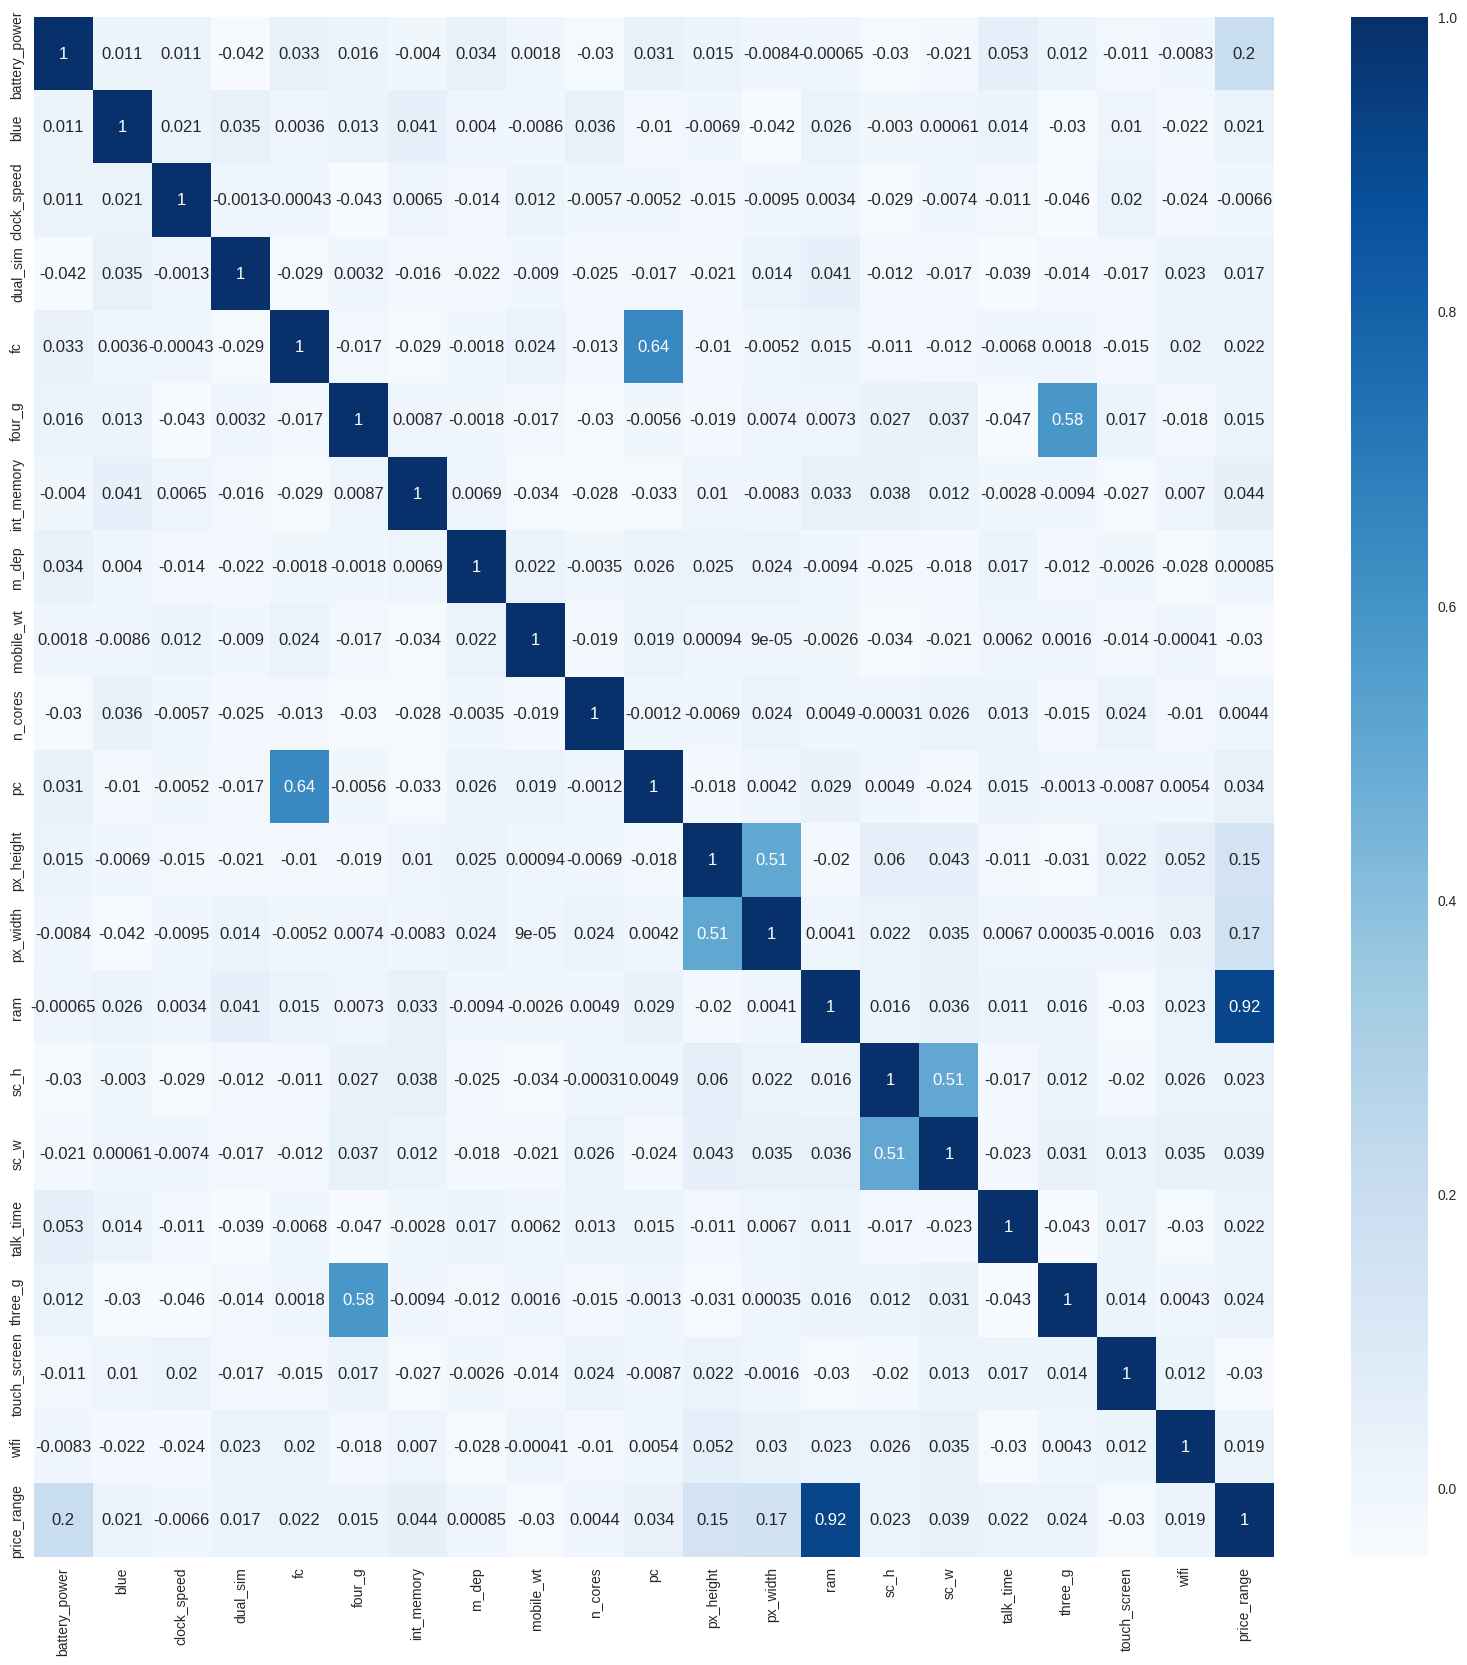

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues');

In [16]:
setup(df,target='price_range')

,Description,Value
0,Session id,6663
1,Target,price_range
2,Target type,Regression
3,Original data shape,"(2000, 21)"
4,Transformed data shape,"(2000, 21)"
5,Transformed train set shape,"(1400, 21)"
6,Transformed test set shape,"(600, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [17]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,0.1287,0.0599,0.2443,0.9510,0.1157,0.0941,0.0390
et,Extra Trees Regressor,0.1820,0.0719,0.2669,0.9410,0.1311,0.1269,0.3590
rf,Random Forest Regressor,0.1821,0.0814,0.2836,0.9332,0.1384,0.1305,0.9610
lightgbm,Light Gradient Boosting Machine,0.2054,0.0816,0.2845,0.9331,0.1399,0.1469,1.4560
gbr,Gradient Boosting Regressor,0.2313,0.0843,0.2896,0.9310,0.1462,0.1548,0.4690
xgboost,Extreme Gradient Boosting,0.1977,0.0885,0.2964,0.9275,0.1446,0.1400,0.3680
br,Bayesian Ridge,0.2721,0.1056,0.3246,0.9139,0.1695,0.1524,0.0310
en,Elastic Net,0.2718,0.1056,0.3247,0.9139,0.1693,0.1519,0.0300
llar,Lasso Least Angle Regression,0.2724,0.1062,0.3256,0.9134,0.1696,0.1522,0.0290
lasso,Lasso Regression,0.2724,0.1062,0.3256,0.9134,0.1696,0.1522,0.0550


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

## <font color='#0F52BA'> Öznitelik Mühendisliği - Feature Engineering

### <font color=#007fff> Model - Modelling

In [18]:
x=df.drop('price_range',axis=1)
y=df[['price_range']]

In [19]:
x=pd.get_dummies(x,drop_first=True)
# Tr =  kategorik değişkenlerin sayısal değişkenlere dönüştürülmesi için kullanılır.
# En = It is used to convert categorical variables into numerical variables.

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
# TR = modelimizi eğittik.
# EN = We trained our model.

In [21]:
x = np.random.random((100, 64, 64, 3))  # 100 örnek, her biri 64x64, 3 kanal
y = np.random.randint(0, 2, size=(100, 1))  # İkili sınıflandırma etiketleri
x_test = np.random.random((24, 64, 64, 3))  # Örnek test verisi
y_test = np.random.randint(0, 2, size=(24, 1))  # Örnek etiketler
model = Sequential([

    # Örnek konvolüsyon katmanları
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    # TR = Bu katman, giriş verisinin belirli bir bölgesindeki (pool size) maksimum değeri seçerek, özellik haritalarının boyutlarını küçültür.
    # Havuzlama penceresinin boyutunu belirtir. 2x2 boyutunda bir pencere kullanılır.

    # EN = This layer reduces the size of the feature maps by selecting the maximum value in a specific region (pool size) of the input data.
    # It specifies the size of the pooling window. A 2x2 window is used.

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    # TR = Derin öğrenme modelindeki çok boyutlu (2D, 3D vb.) verileri tek boyutlu bir vektöre dönüştürür.
    # EN = It converts multidimensional (2D, 3D, etc.) data in the deep learning model into a one-dimensional vector.

    Dense(240, activation='relu'),
    # TR = Bu katman, tüm giriş nöronlarına bağlantı kurar ve her nöronun ağırlıklarını öğrenir. 240 nöron var.
    # Aktivasyon fonksiyonunu ReLU (Rectified Linear Unit) olarak ayarlar. ReLU fonksiyonu, negatif değerleri sıfıra dönüştürür ve pozitif değerleri olduğu gibi bırakır.

    # EN = This layer connects all input neurons and learns the weights of each neuron. There are 240 neurons.
    # Sets the activation function to ReLU (Rectified Linear Unit). The ReLU function converts negative values ​​to zero and leaves positive values ​​as is.

    BatchNormalization(),
    # TR = Bu katman, modelin eğitim sürecini daha stabil hale getirmek için kullanılır.
    # EN = This layer is used to make the training process of the model more stable.


    Dense(120, activation='relu'),
    BatchNormalization(),

    Dense(64, activation='relu'),
    BatchNormalization(),

    Dense(24, activation='relu'),
    BatchNormalization(),

    Dense(12, activation='relu'),
    BatchNormalization(),

    Dense(2, activation='relu'),
    Dropout(0.5),
    # TR = Derin öğrenme modelinde aşırı uyumu (overfitting) azaltmak için kullanılır.
    # EN = It is used to reduce overfitting in the deep learning model.

    Dense(1,activation='sigmoid')
    # TR = Sigmoid aktivasyon fonksiyonu, her bir nöronun çıkışını 0 ile 1 arasında bir değere dönüştürür.
    # Bu, özellikle ikili sınıflandırma problemlerinde her iki sınıfa ait olasılıkları tahmin etmek için uygundur.
    # EN = The sigmoid activation function transforms the output of each neuron into a value between 0 and 1.
    # This is particularly suitable for estimating probabilities of belonging to both classes in binary classification problems.

    # TR = activation='sigmoid' iki sınıftan birine ait olup olmadığını tahmin etmek için kullanılır. Örneğin, bir e-postanın spam olup olmadığını sınıflandırmak.
    # EN = activation='sigmoid' is used to predict whether an email belongs to one of two classes. For example, to classify whether an email is spam or not.
])

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])
# TR = Mean Squared Error (MSE): Bu kayıp fonksiyonu, regresyon problemlerinde kullanılır. Modelin tahminleri ile gerçek değerler arasındaki farkların karelerinin ortalamasını hesaplar.
# EN = Mean Squared Error (MSE): This loss function is used in regression problems. It calculates the average of the squared differences between the model's predictions and the true values.

# TR = optimizer='adam': Adam (Adaptive Moment Estimation) optimizasyon algoritması, modelin ağırlıklarını güncellerken kullanılan bir yöntemdir.
# EN = optimizer='adam': Adam (Adaptive Moment Estimation) optimization algorithm is a method used when updating the weights of the model.

# TR = (MAE): Ortalama Mutlak Hata, modelin tahminleri ile gerçek değerler arasındaki farkların mutlak değerlerinin ortalamasını hesaplar.
# EN = (MAE): (MAE): Mean Absolute Error calculates the average of the absolute values ​​of the differences between the model's predictions and the true values.

In [22]:
history=model.fit(x,y,epochs=10,batch_size=32, validation_split=.20,verbose=1)
#epochs=Eğitim verilerinin tamamının modele aktarıldığı ve ardından modelin güncellenmesi işleminin bir kez gerçekleştirildiği bir döngü olarak tanımlanabilir.
#batch_size=Bir şeferde kaç tane satır alacağını ve hesaplayacağını şöylüyor
#validation_split=train_test_split gibi
#verbose=Modelin eğitimi sırasında konsola (veya diğer çıktı cihazlarına) yazdırılan bilgi miktarını kontrol eder.

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 352ms/step - loss: 0.2605 - mae: 0.5000 - val_loss: 0.2487 - val_mae: 0.4986
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - loss: 0.2285 - mae: 0.4701 - val_loss: 0.2486 - val_mae: 0.4986
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step - loss: 0.2205 - mae: 0.4590 - val_loss: 0.2488 - val_mae: 0.4988
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step - loss: 0.2172 - mae: 0.4594 - val_loss: 0.2481 - val_mae: 0.4980
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step - loss: 0.2078 - mae: 0.4438 - val_loss: 0.2471 - val_mae: 0.4969
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 360ms/step - loss: 0.1946 - mae: 0.4297 - val_loss: 0.2464 - val_mae: 0.4960
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 309ms/step - loss: 0.1962 - mae: 0.4320 - val_loss: 0.2457 - val_mae: 0.4951
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - loss: 0.1725 - mae: 0.3981 - val_loss: 0.2450 - val_mae: 0.4941
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - loss: 0.1888 - mae: 

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 240)                 │       1,106,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 240)                 │             960 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 120)                 │          28,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 120)                 │             480 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           7,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │           1,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 12)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12)                  │              48 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              26 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2)                   │              

 Total params: 3,717,565 (14.18 MB)

 Trainable params: 1,238,881 (4.73 MB)

 Non-trainable params: 920 (3.59 KB)

 Optimizer params: 2,477,764 (9.45 MB)

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test)
# TR = test_loss değişkeni, test verileri üzerinde hesaplanan kayıp değerini içerir. test_acc değişkeni, test verileri üzerinde hesaplanan doğruluk değerini içerir.
# EN = The test_loss variable contains the loss value calculated on the test data. The test_acc variable contains the accuracy value calculated on the test data.

print(f"Test doğruluğu: {test_acc:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.2715 - mae: 0.5199
Test doğruluğu: 0.5199


In [25]:
pred=model.predict(x_test)
# TR = modeli x_test ile predict özelliği ile tahmin ettik. predict=tahmin demek. Dahmin edip pred eşitledik.
# EN = We predicted the model with x_test and the predict feature. predict=means prediction. We guessed and equalized the pred.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


In [26]:
r2_score(y_test,pred)
# TR = Bunu gerçek(y_test) değer ile tahmin(pred) edilen değerleri karşılaştır ve arasındaki farkı bul.
# EN = Compare this with the actual (y_test) value and the predicted (pred) values ​​and find the difference between them.

-0.44775289273627905

In [27]:
mean_squared_error(y_test,pred)**.5
# TR = Burada, Root Mean Square Error bulduk. Bunu gerçek(y_test) değer ile tahmin(pred) edilen değerleri karşılaştır arasındaki farkı bul ve **.5 ile karekökünü al.
# EN = Here, we found Root Mean Square Error. Compare this with the actual (y_test) value and the predicted (pred) values, find the difference and take the square root of **.5.

0.5210121566605258

In [28]:
mean_absolute_error(y_test,pred)
# TR = mean_absolute_error ile (y_test,pred) kullanarak değerini hesaplama.
# EN = Calculating the value of mean_absolute_error using (y_test,pred).

0.5198864017923673

In [29]:
loss_f=pd.DataFrame(history.history)

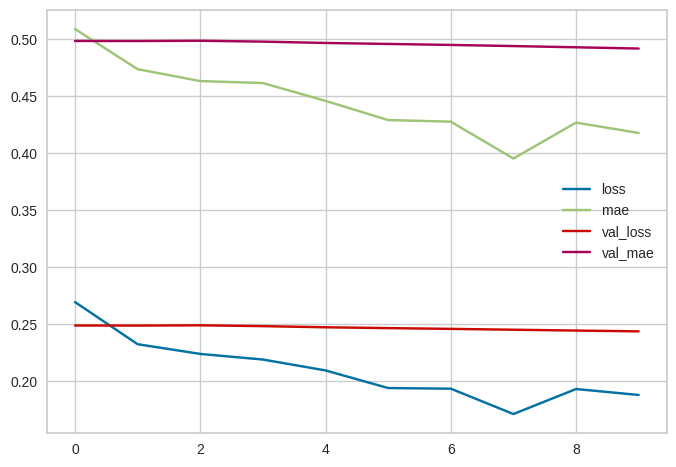

In [30]:
loss_f.plot();